In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
directory = '~/PycharmProjects/tfm_hugopobil'
df = pd.read_csv(f'{directory}/data/sampled_data/tweets_nlp_modelling_v2.csv')
btc_usd_grouped = pd.read_csv(f'{directory}/data/sampled_data/btc_usd_grouped_v2.csv')
df.head()

,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target
0,2021-02-05,Bitcoin and ETH both have bullish setups for a...,Bitcoin ETH bullish setup move higher BTC woul...,NaN,0.416667,0.350000,neutral,False
1,2021-02-05,4⃣ 🎙️ Bloomberg LP CryptoOutlook 2021 with ⬇️...,Bloomberg LP CryptoOutlook cryptocurrency bitc...,NaN,0.000000,0.000000,positive,False
2,2021-02-05,⬇️⬇️ $BTC SELLING PRESSURE ALERT 📉 Price tradi...,BTC SELLING PRESSURE ALERT Price trading aroun...,NaN,0.000000,0.000000,positive,False
3,2021-02-05,"If hyperinflation does hit again, think of the...",If hyperinflation hit think inflation like flo...,NaN,0.541667,-0.291667,negative,False
4,2021-02-05,DeriBot Daily Trading Report 5.02.2021 11:42 U...,DeriBot Daily Trading Report UTC Bitcoin Tradi...,NaN,0.000000,0.000000,positive,False


In [5]:
df['polarity'] = preprocessing.scale(df.polarity)
df = df.set_index('date_clean')
df_agg = df.polarity.groupby(by=df.index).agg('mean')
df_agg = df_agg.to_frame()

df_agg['scale_polarity'] = preprocessing.scale(df_agg.polarity)
btc_usd_grouped['scale_adj_close'] = preprocessing.scale(btc_usd_grouped['Adj Close'])

In [6]:
# df = df.drop(columns=['Unnamed: 0'])

In [7]:
df_merge = pd.merge(btc_usd_grouped.set_index('Date'), df_agg, left_index=True, right_index=True)

<AxesSubplot:>

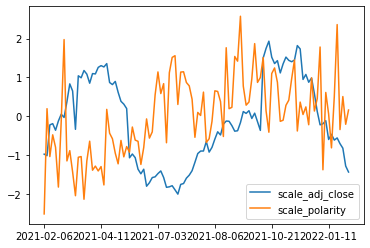

In [8]:
df_merge[['scale_adj_close', 'scale_polarity']].plot()

Auto-Correlation:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

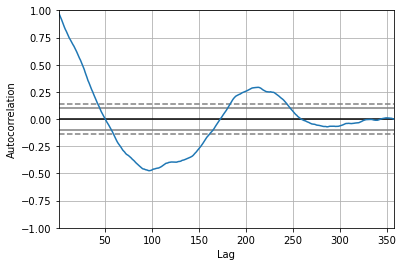

In [9]:
autocorrelation_plot(btc_usd_grouped['Adj Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

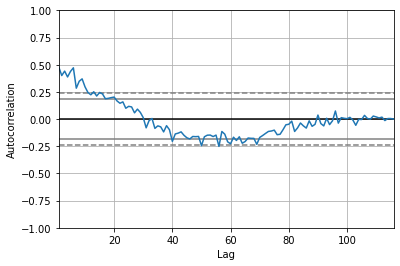

In [10]:
autocorrelation_plot(df_agg.polarity)